# 2012 US Presidential Election Data Project

In this Data Project we will be looking at data from the 2016 election.
In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:
1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
import requests # Use to grab data from the web(HTTP capabilities)

In [4]:
import io #Required to work with pulled csv file
from io import StringIO

In [6]:
#url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv" #url of data
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text #pulled the data as a text file
poll_data = StringIO(source) # Use StringIO to avoid an IO error with pandas

In [7]:
poll_df = pd.read_csv(poll_data) #Coverting poll data to dataframe

In [8]:
poll_df.to_csv("Poll_data_2012.csv") #Saving the dataframe as csv file for offline accessing.

In [9]:
poll_dataframe = pd.read_csv("Poll_data_2012.csv")

In [10]:
poll_dataframe.drop("Unnamed: 0",axis=1,inplace=True)
poll_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [11]:
poll_dataframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Let's get a quick view of affiliations of the polls

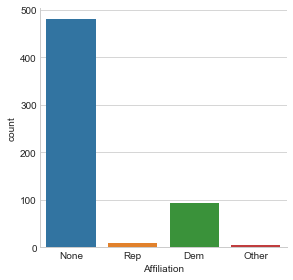

In [12]:
sns.factorplot('Affiliation',data=poll_dataframe,kind="count")

From the graph it is clear that most of the polls were not affiliated to any parties. There was some affiliation to Democratic and a little for Republicans

Let's see if sorting by the Population hue gives us any further insight into the data.

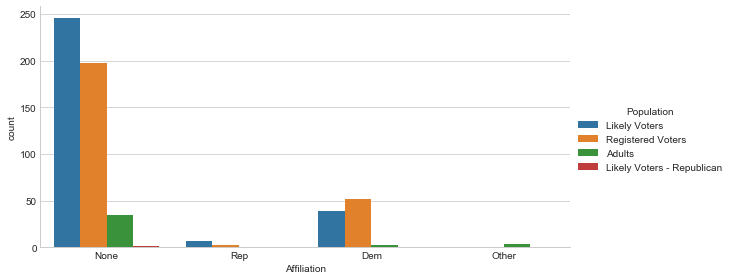

In [13]:
sns.factorplot('Affiliation',data=poll_dataframe,kind="count",hue="Population",aspect=2)

Looks like we had a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. 

Let's go ahead and take a look at the averages for Obama, Romeny , and the polled people who remained undecided.

In [14]:
avg = pd.DataFrame(poll_dataframe.mean())
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [15]:
avg.drop("Number of Observations",axis=0,inplace=True)
avg.drop("Question Text",axis=0,inplace=True)
avg.drop("Question Iteration",axis=0,inplace=True)

In [16]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [17]:
std = pd.DataFrame(poll_dataframe.std())

In [18]:
std.drop("Number of Observations",axis=0,inplace=True)
std.drop("Question Text",axis=0,inplace=True)
std.drop("Question Iteration",axis=0,inplace=True)

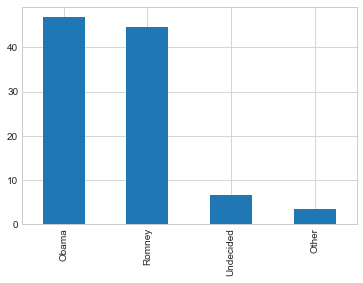

In [19]:
avg.plot(kind="bar",legend=False)

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers

In [20]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ["Average","STD"]
poll_avg.head()

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


It seems undecided votors played a major role in final results. Let us plot voter's sentiment over time.

In [21]:
poll_dataframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


We could also do a quick time series analysis of the voter sentiment by plotting Trump/Clinton favor versus the Poll End Dates

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

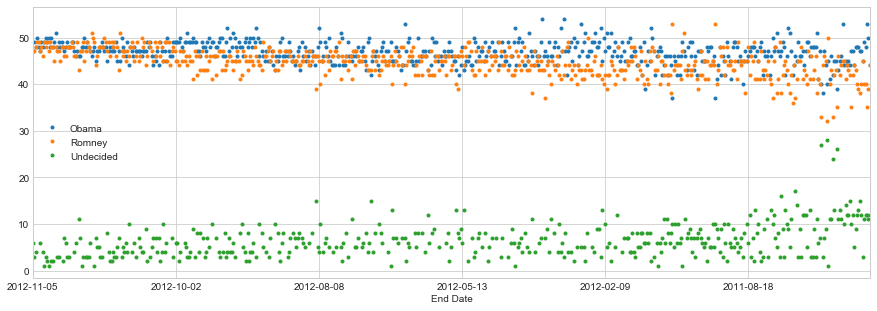

In [22]:
poll_dataframe.plot(x="End Date",y=["Obama","Romney","Undecided"],linestyle="",marker=".",figsize=(15,5))

The rough idea which we get is as the time of voting approached, number of undecided voters reduced and competition between Obama and Romney came closer.

In [23]:
from datetime import datetime

In [24]:
poll_dataframe["Difference OvsR"] = (poll_dataframe.Obama - poll_dataframe.Romney)

In [25]:
poll_dataframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference OvsR
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


A positive difference means inclination towards Obama.

In [26]:
poll_sentiment = poll_dataframe.groupby(["Start Date"],as_index=False).mean()
poll_sentiment.drop(["Question Iteration","Other"],axis=1,inplace=True)
poll_sentiment.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Question Text,Difference OvsR
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,0.0
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,11.0
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,18.0
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,8.0
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,9.0


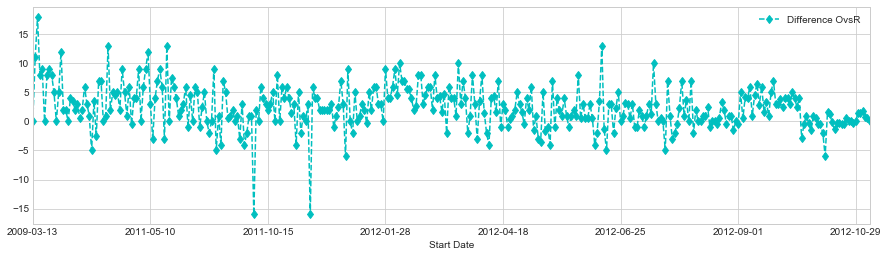

In [27]:
fig = poll_sentiment.plot('Start Date','Difference OvsR',figsize=(15,4),marker='d',linestyle='--',color='c',legend=True)

Upon analysing we find that inclination towards Obama was from begining with large fluctuation occurring in October of 2011 and around end of 2011.

Let us find out trend after debates on Oct 3rd, Oct 11, and Oct 22nd.

In order to find that we will find the index for month of October.

In [28]:
row_index = 0
xlimit = [] 

for date in poll_sentiment["Start Date"]:
    if (date[0:7] == "2012-10"):
        xlimit.append(row_index)
        row_index += 1
    else:
        row_index += 1

print(min(xlimit))
print(max(xlimit))

325
352


In [30]:
poll_sentiment.ix[335]

Start Date                2012-10-13
Number of Observations          1163
Obama                             47
Romney                          47.5
Undecided                          3
Question Text                    NaN
Difference OvsR                 -0.5
Name: 335, dtype: object

In [31]:
poll_sentiment.loc[poll_sentiment["Start Date"].isin(["2012-10-04","2012-10-11","2012-10-22"])]

,Start Date,Number of Observations,Obama,Romney,Undecided,Question Text,Difference OvsR
327,2012-10-04,1061.50,45.833333,48.666667,6.000000,NaN,-2.833333
333,2012-10-11,1335.25,47.000000,46.500000,5.666667,NaN,0.500000
343,2012-10-22,1364.00,46.666667,47.000000,6.500000,NaN,-0.333333


In the month of september, trends were in favor of Hillary. Let us see impact of debates.

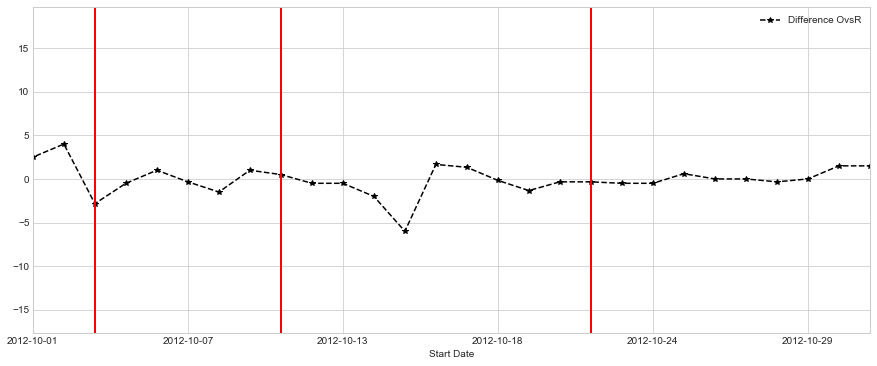

In [32]:
fig = poll_sentiment.plot("Start Date","Difference OvsR",xlim=(325,352),figsize=(15,6),linestyle="--",marker="*",color="k")
plt.axvline(x=327,linewidth="2",color="r")
plt.axvline(x=333,linewidth="2",color="r")
plt.axvline(x=343,linewidth="2",color="r")

Interesting to see that after first debate popularity of Obama increased which fell after second debate. It rose again after third debate.

## Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:
1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What were the demographics of the donors?
5. Is there a pattern to donation amounts?

In [33]:
donor_data = pd.read_csv("Election_Donor_Data.csv")

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [35]:
donor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


Let's see the value count of different amounts donated.

In [36]:
donor_data["contb_receipt_amt"].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

So we have 8079 different denominations of donations with maximum being $100. Lets find its mean and standard deviation.

In [37]:
donation_mean = donor_data.contb_receipt_amt.mean()
donation_std = donor_data.contb_receipt_amt.std()
print("The mean of donations is $",donation_mean,"and the standard deviation is $",donation_std)

The mean of donations is $ 298.2351500951093 and the standard deviation is $ 3749.666723269043


A large value for deviation means their are varied values which we have to look around.

In [38]:
top_donor = donor_data["contb_receipt_amt"].copy() #Copying all donation amounts to a series
top_donor.sort_values() # Arranging list of donations in ascending order.

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

The maximum donation wass $2014490.51 while there are quite a lot negative values. We shall remove negative values as they are amount which was returnedd back to donators

In [39]:
top_donor = top_donor[top_donor > 0] #Cleaning data by removing negative values
top_donor.head()

0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
Name: contb_receipt_amt, dtype: float64

In [40]:
top_donor.value_counts().head(10) #Count of highest ten donation values counts.

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Text(0.5,0,'Donation amount -->')

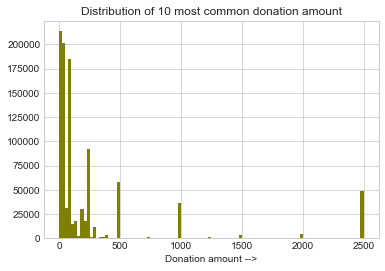

In [41]:
common_donations = top_donor[top_donor < 2501]
common_donations.hist(bins=100,color="olive")
plt.title("Distribution of 10 most common donation amount")
plt.xlabel("Donation amount -->")

Plotting the distribution of 10 most common donation amouonts, we find peaks at 10,50,100,500,1000,etc. (basically at round numbers)

For analysing donations made party wise, we need to find out all the candidates and allocate their parties.

In [42]:
candidates = donor_data.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [43]:
#Creating dictionary for candidates and their parties
party_map = {'Bachmann, Michelle':"Republican",'Romney, Mitt':"Republican",'Obama, Barack':"Democrat",
            "Roemer, Charles E. 'Buddy' III":"Republican",'Pawlenty, Timothy':"Republican",'Johnson, Gary Earl':"Republican",
            'Paul, Ron':"Republican",'Santorum, Rick':"Republican",'Cain, Herman':"Republican",'Gingrich, Newt':"Republican",
             'McCotter, Thaddeus G':"Republican",'Huntsman, Jon':"Republican",'Perry, Rick':"Republican"}
donor_data["Party"] = donor_data.cand_nm.map(party_map)

In [44]:
#Another way of classifying candidates in parties but takes longer time to execute.
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [45]:
donor_data = donor_data[donor_data.contb_receipt_amt > 0] #cleaning data by removing donations returned back
donor_data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let us now see which candidate received the maximum number of donations

In [46]:
donor_data.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

So Obama received maximum number of donations. This maybe because he was the only Democratic candidate. Let us see what is the amount which each candidate gets. 

In [47]:
donor_data.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

Let us make the above data in more readable format.

In [48]:
candidate_amount = donor_data.groupby("cand_nm")["contb_receipt_amt"].sum() #Getting amount of each candidate
#Loop to clean data
i = 0
for donation in candidate_amount:
    print(candidate_amount.index[i],"raised $ %d" %donation) #printing only the integar part
    i = i+1

Bachmann, Michelle raised $ 2711439
Cain, Herman raised $ 7101081
Gingrich, Newt raised $ 12832769
Huntsman, Jon raised $ 3330373
Johnson, Gary Earl raised $ 566961
McCotter, Thaddeus G raised $ 39030
Obama, Barack raised $ 135877427
Paul, Ron raised $ 21009619
Pawlenty, Timothy raised $ 6004819
Perry, Rick raised $ 20305753
Roemer, Charles E. 'Buddy' III raised $ 373009
Romney, Mitt raised $ 88335907
Santorum, Rick raised $ 11043159


Its hard to analyse all the numbers so lets plot each of them.

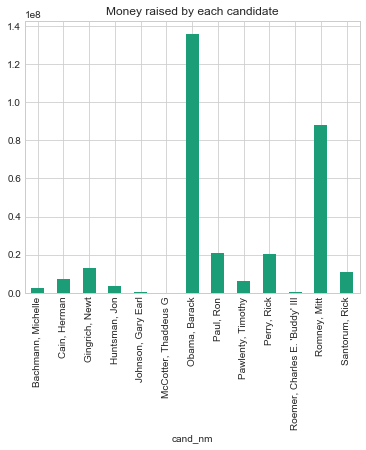

In [49]:
candidate_amount.plot(kind="bar",figsize=(6,5),colormap="Dark2",title="Money raised by each candidate")

Now the graph makes clear that Barrack Obama was forerunner in raising donations. Lets do a quick comparision for Democrats Vs Republicans.

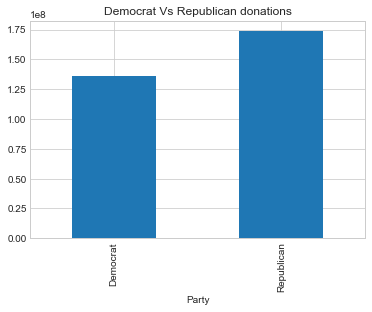

In [50]:
donor_data.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar",title="Democrat Vs Republican donations")

The above graph makes clear that Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

Moving to final part of analysis, let us see impact of profession on donations received.

In [51]:
occupations = donor_data.pivot_table("contb_receipt_amt",index="contbr_occupation",columns='Party', aggfunc='sum')

In [52]:
occupations.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [53]:
occupations.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [57]:
occupations.shape

(45067, 2)

So there are 45,067 different occupation groups in our dataset. Many have donation amounts not big enough to make an impact so we will get rid of any profession group whose donation is less than 1 million dollar.

In [58]:
occupations = occupations[occupations.sum(1) >= 1000000]

In [59]:
occupations.shape

(31, 2)

Now it will be easier to work with dataset.

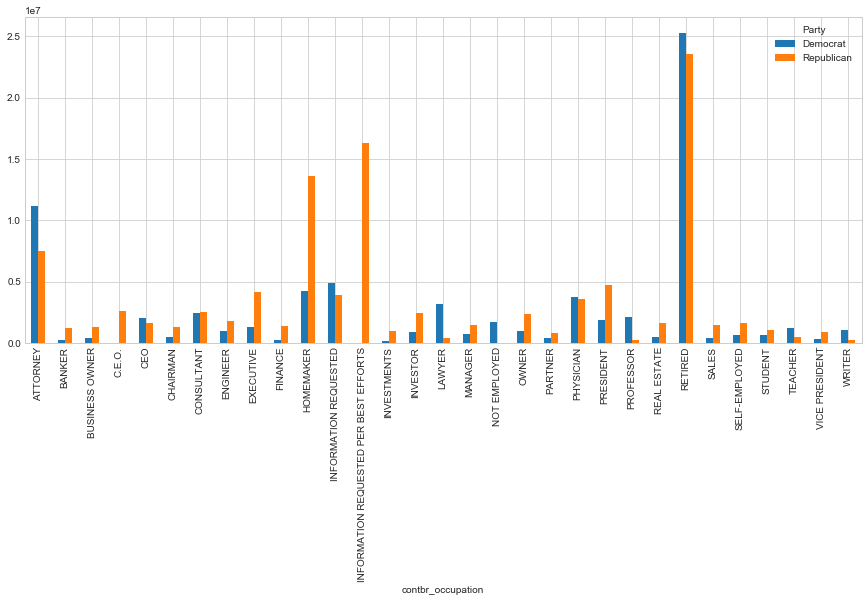

In [62]:
occupations.plot(kind="bar",figsize=(15,6))

Looks like there are some occupations that are either mislabeled or aren't really occupations.

Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

Also let us make graph more legible.

In [63]:
#Dropping unclear professions
occupations.drop(["INFORMATION REQUESTED","INFORMATION REQUESTED PER BEST EFFORTS"],axis=0,inplace=True)

In [64]:
#Merging CEO and C.E.O.
occupations.loc["CEO"] = occupations.loc["CEO"]+occupations.loc["C.E.O."]
occupations.drop(["C.E.O."],axis=0,inplace=True)

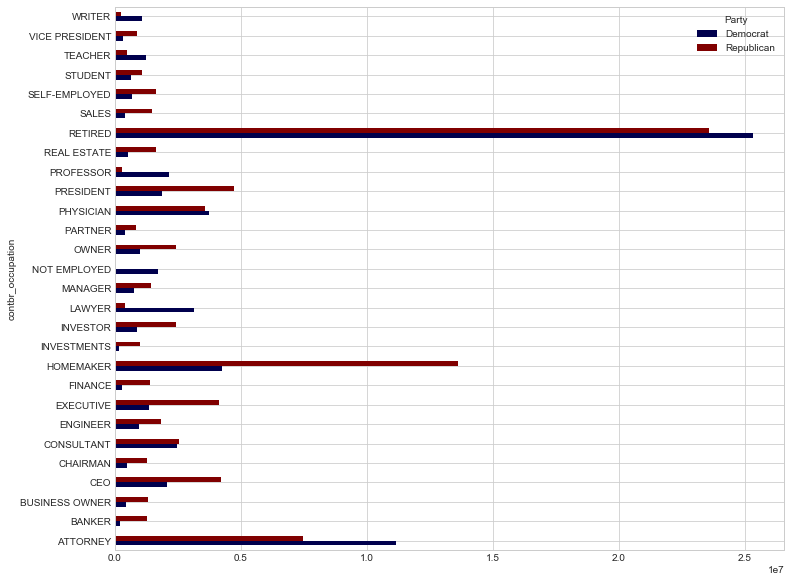

In [69]:
occupations.plot(kind="barh",figsize=(12,10),cmap="seismic")

The above graph can be utilised to see how different professional groups feel about policies of different candidates.

This concludes Election data analysis part. But there are still numerous other analysis that can still be performed.